In [2]:
import cv2
import PIL
import os
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import face_rec

Using TensorFlow backend.


In [3]:
image = cv2.imread('photo/two_face.jpg')
ebn = cv2.imread('photo/ebn_bill.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

error: OpenCV(3.4.5) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


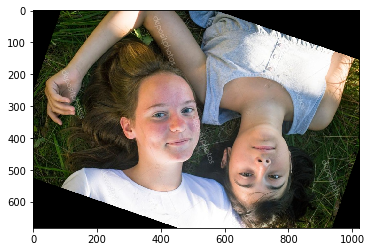

In [94]:
plt.imshow(image_rot)

# Crop Image

In [45]:
cropped_face = crop_faces(image)
#cropped_face[0].shape

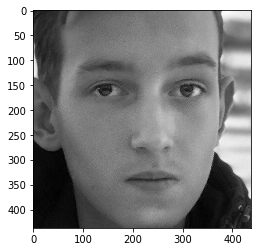

In [46]:
plt.imshow(cropped_face[0],cmap='gray')

# Reshape image 

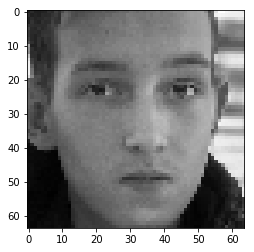

In [47]:
resized_image = cv2.resize(cropped_face[0], (64, 64))
plt.imshow(resized_image,cmap='gray')

In [71]:
resized_image.shape

(64, 64)

# Rotate Image

In [72]:
rotate_f = rotate_image(cropped_face[0],14)

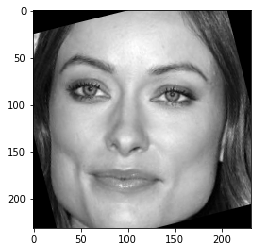

In [73]:
plt.imshow(rotate_f,cmap='gray')

# Find and crop all faces

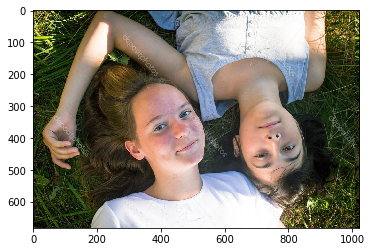

In [23]:
plt.imshow(image)

In [1]:
from scipy import ndimage

def crop_faces(image):
    """

    :param image: Картинка (cv2.imread())
    :return: list со всеми кропнутыми лицами(даже если лицо одно)
    
    """

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # конвертируем изображение в RGB
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # делаем изображение ЧБ
    face_crop = []
    
    angles = [0,90,180,270]
    for angle in angles:
        image = ndimage.rotate(image,angle)
        faces = face_rec.face_locations(image)
    
        for f in faces:
     #   print(f)
            top, right, bottom, left = [v for v in f]
            face_crop.append(image[top:bottom, left:right])

    return face_crop

In [17]:
cropped = crop_faces(image)

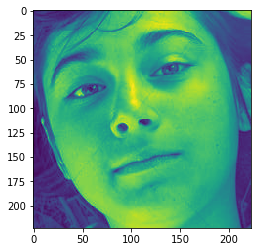

In [26]:
plt.imshow(cropped[1]) 